# WPL 2026 Runs Prediction using Machine Learning

## Objective
The objective of this project is to predict the expected runs scored per ball in the WPL 2026 season using historical ball-by-ball data from previous seasons.

Since actual 2026 data is unavailable, simulated future match scenarios are used for prediction.


importing libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix

sns.set_style("whitegrid")

ANALYSIZING DATA

In [36]:
df1 = pd.read_csv("wpl_2024_deliveries.csv")
df2 = pd.read_csv("wpl_2025_deliveries.csv")

print(df1.shape)
print(df2.shape)
print(df1.columns)
print(df2.columns)
df2.drop(columns=["phase"])

(5177, 20)
(5210, 21)
Index(['match_id', 'season', 'match_no', 'date', 'venue', 'batting_team',
       'bowling_team', 'innings', 'over', 'striker', 'bowler', 'runs_of_bat',
       'extras', 'wide', 'legbyes', 'byes', 'noballs', 'wicket_type',
       'player_dismissed', 'fielder'],
      dtype='object')
Index(['match_id', 'season', 'phase', 'match_no', 'date', 'venue',
       'batting_team', 'bowling_team', 'innings', 'over', 'striker', 'bowler',
       'runs_of_bat', 'extras', 'wide', 'legbyes', 'byes', 'noballs',
       'wicket_type', 'player_dismissed', 'fielder'],
      dtype='object')


,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202501,2025,1,"Feb 14, 2025","Kotambi Stadium, Vadodara",GGTW,RCBW,1,0.1,Mooney,Renuka Singh,0,0,0,0,0,0,NaN,NaN,NaN
1,202501,2025,1,"Feb 14, 2025","Kotambi Stadium, Vadodara",GGTW,RCBW,1,0.2,Mooney,Renuka Singh,4,0,0,0,0,0,NaN,NaN,NaN
2,202501,2025,1,"Feb 14, 2025","Kotambi Stadium, Vadodara",GGTW,RCBW,1,0.3,Mooney,Renuka Singh,0,0,0,0,0,0,NaN,NaN,NaN
3,202501,2025,1,"Feb 14, 2025","Kotambi Stadium, Vadodara",GGTW,RCBW,1,0.4,Mooney,Renuka Singh,1,0,0,0,0,0,NaN,NaN,NaN
4,202501,2025,1,"Feb 14, 2025","Kotambi Stadium, Vadodara",GGTW,RCBW,1,0.5,Wolvaardt,Renuka Singh,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,202522,2025,22,"Mar 15, 2025","Brabourne Stadium, Mumbai",DCW,MIW,2,19.2,Nallapureddy Charani,Nat Sciver-Brunt,1,0,0,0,0,0,NaN,NaN,NaN
5206,202522,2025,22,"Mar 15, 2025","Brabourne Stadium, Mumbai",DCW,MIW,2,19.3,Niki Prasad,Nat Sciver-Brunt,0,0,0,0,0,0,NaN,NaN,NaN
5207,202522,2025,22,"Mar 15, 2025","Brabourne Stadium, Mumbai",DCW,MIW,2,19.4,Niki Prasad,Nat Sciver-Brunt,1,0,0,0,0,0,NaN,NaN,NaN
5208,202522,2025,22,"Mar 15, 2025","Brabourne Stadium, Mumbai",DCW,MIW,2,19.5,Nallapureddy Charani,Nat Sciver-Brunt,1,0,0,0,0,0,NaN,NaN,NaN


In [37]:
print(df1.isnull().sum())
print(df2.isnull().sum())
df1 = df1.drop(columns=["wicket_type", "player_dismissed", "fielder"],errors="ignore")
df2 = df2.drop(columns=["wicket_type", "player_dismissed", "fielder"],errors="ignore")




match_id               0
season                 0
match_no               0
date                   0
venue                  0
batting_team           0
bowling_team           0
innings                0
over                   0
striker                0
bowler                 0
runs_of_bat            0
extras                 0
wide                   0
legbyes                0
byes                   0
noballs                0
wicket_type         4910
player_dismissed    4910
fielder             4999
dtype: int64
match_id               0
season                 0
phase                  0
match_no               0
date                   0
venue                  0
batting_team           0
bowling_team           0
innings                0
over                   0
striker                0
bowler                 0
runs_of_bat            0
extras                 0
wide                   0
legbyes                0
byes                   0
noballs                0
wicket_type         4923
player_dismi

In [38]:
df_newdata=pd.concat([df1,df2])
df_newdata.reset_index(drop=True,inplace=True)
df_newdata.shape

(10387, 18)

In [39]:
y=df_newdata["runs_of_bat"]
x=df_newdata.drop(columns=["runs_of_bat"])

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

text_columns=x.select_dtypes(include="object").columns

for col in text_columns:
    x[col]=le.fit_transform(x[col])
    
x.head(10)

,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,extras,wide,legbyes,byes,noballs,phase
0,202410,2024,10,23,4,0,1,1,0.1,40,64,0,0,0,0,0,3
1,202410,2024,10,23,4,0,1,1,0.2,40,64,1,1,0,0,0,3
2,202410,2024,10,23,4,0,1,1,0.2,40,64,0,0,0,0,0,3
3,202410,2024,10,23,4,0,1,1,0.3,71,64,0,0,0,0,0,3
4,202410,2024,10,23,4,0,1,1,0.4,71,64,0,0,0,0,0,3
5,202410,2024,10,23,4,0,1,1,0.5,71,64,0,0,0,0,0,3
6,202410,2024,10,23,4,0,1,1,0.6,71,64,0,0,0,0,0,3
7,202410,2024,10,23,4,0,1,1,1.1,40,6,0,0,0,0,0,3
8,202410,2024,10,23,4,0,1,1,1.2,71,6,0,0,0,0,0,3
9,202410,2024,10,23,4,0,1,1,1.3,71,6,0,0,0,0,0,3


TRAINING

## Exploratory Data Analysis (EDA)

This section explores the distribution and characteristics of runs scored per ball to understand the prediction complexity.


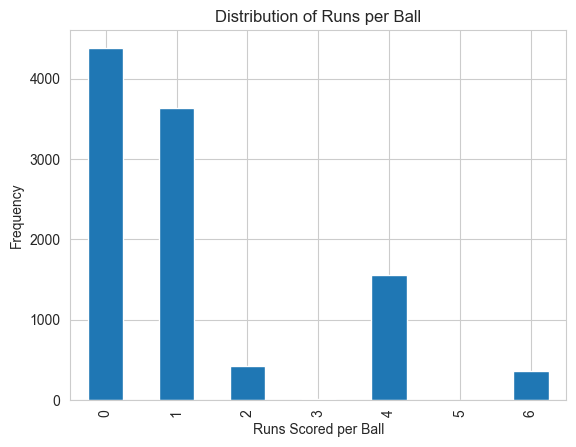

In [40]:
import matplotlib.pyplot as plt

df_newdata["runs_of_bat"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Runs Scored per Ball")
plt.ylabel("Frequency")
plt.title("Distribution of Runs per Ball")
plt.show()


### Insight
Most balls result in 0 or 1 run, indicating a highly skewed distribution. 
This explains why predicting exact outcomes is difficult and why regression metrics such as R² remain low.


In [41]:
# Create innings phase feature
def get_phase(over):
    if over < 6:
        return "Powerplay"
    elif over < 15:
        return "Middle"
    else:
        return "Death"

df_newdata["phase"] = df_newdata["over"].apply(get_phase)


### Feature Engineering
An innings phase feature was created to capture scoring pattern differences across Powerplay, Middle, and Death overs.


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)

(8309, 17)
(2078, 17)


LINEAR REGRESSION

In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_lr=lr.predict(x_test)


EVALUATE

In [44]:
mae_lr=mean_squared_error(y_test,y_pred_lr)
r2_score=r2_score(y_test,y_pred_lr)

print("Linear regression mae=",mae_lr)
print("Linear regression r2_score=",r2_score)

Linear regression mae= 2.651876555079077
Linear regression r2_score= 0.03885903881234065


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MAE =", mae_rf)
print("Random Forest R2  =", r2_rf)


Random Forest MAE = 1.3285274302213668
Random Forest R2  = -0.1664723915544013


GRAPHICAL REPRESENTATION

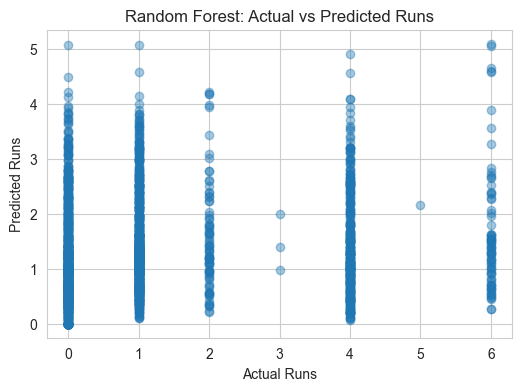

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_rf, alpha=0.4)
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Random Forest: Actual vs Predicted Runs")
plt.show()


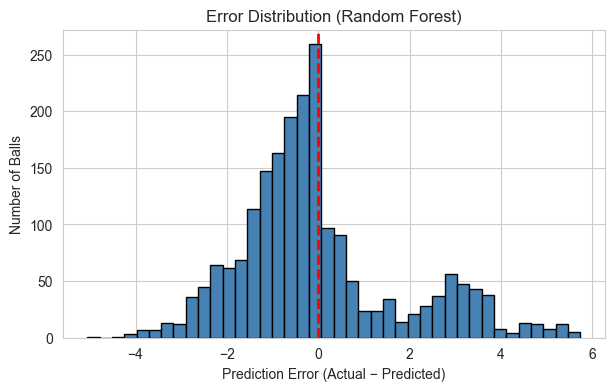

In [47]:
errors = y_test - y_pred_rf

plt.figure(figsize=(7,4))
plt.hist(errors, bins=40, color="steelblue", edgecolor="black")
plt.axvline(0, color="red", linestyle="--", linewidth=2)

plt.xlabel("Prediction Error (Actual − Predicted)")
plt.ylabel("Number of Balls")
plt.title("Error Distribution (Random Forest)")

plt.show()


## Model Selection Strategy

Linear Regression was used as a baseline model to establish a performance reference.
Random Forest was selected as the final model due to its ability to capture non-linear patterns in cricket data.


COMPARISION


Linear Regression MAE: 2.651876555079077
Random Forest MAE: 1.3285274302213668


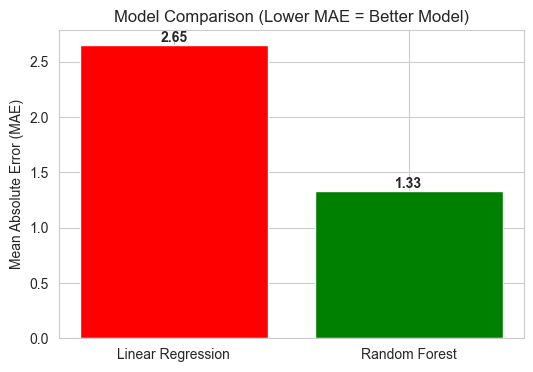

In [48]:

print("Linear Regression MAE:", mae_lr)
print("Random Forest MAE:", mae_rf)


import matplotlib.pyplot as plt

models = ["Linear Regression", "Random Forest"]
mae_values = [mae_lr, mae_rf]

plt.figure(figsize=(6,4))

bars = plt.bar(
    models,
    mae_values,
    color=["red", "green"]
)

plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Comparison (Lower MAE = Better Model)")

# show MAE value on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontweight="bold"
    )

plt.show()


In [52]:
from sklearn.model_selection import cross_val_score

cv_mae = -cross_val_score(
    rf, x, y, 
    scoring="neg_mean_absolute_error",
    cv=5
)

print("Cross-validated MAE:", cv_mae.mean())


Cross-validated MAE: 1.2506044959159


PREDICTING 2026 

In [ ]:
X_2026 = x_test.sample(10, random_state=42)
predict_runs_2026=rf.predict(X_2026)
wpl_2026_prediction = X_2026.copy()
wpl_2026_prediction["predict_runs_2026"] = predict_runs_2026
wpl_2026_prediction["season"] = 2026

wpl_2026_prediction



,match_id,season,match_no,date,venue,batting_team,bowling_team,innings,over,striker,bowler,extras,wide,legbyes,byes,noballs,phase,predict_runs_2026
3881,202406,2026,6,17,4,3,5,1,14.2,43,18,0,0,0,0,0,3,1.16
6464,202506,2026,6,5,3,0,5,2,0.3,71,32,0,0,0,0,0,2,0.67
3317,202403,2026,3,11,4,3,1,2,7.5,2,17,0,0,0,0,0,3,1.06
1020,202414,2026,14,29,0,3,5,1,2.3,91,20,0,0,0,0,0,3,1.09
1056,202414,2026,14,29,0,3,5,1,8.3,36,53,0,0,0,0,0,3,1.81
2823,202420,2026,20,39,0,0,1,2,1.6,40,6,0,0,0,0,0,3,1.23
212,202410,2026,10,23,4,1,0,2,13.5,22,58,0,0,0,0,0,3,0.96
9774,202520,2026,20,37,2,4,3,1,19.6,87,2,0,0,0,0,0,2,2.37
3519,202404,2026,4,13,4,0,5,2,1.6,71,36,0,0,0,0,0,3,1.02
10386,202522,2026,22,42,2,0,3,2,19.6,52,41,0,0,0,0,0,1,0.87


## WPL 2026 Prediction (Scenario-Based Forecasting)

Since future data is unavailable, recent match situations were used as simulated scenarios to estimate expected runs per ball for the 2026 season.


FUTURE 2026 IMPLEMENTATION

In [ ]:
future_2026_view = wpl_2026_prediction.copy()

future_2026_view["season"] = 2026

future_2026_view = future_2026_view.drop(
    columns=["match_id", "match_no", "date"],
    errors="ignore"
)

future_2026_view.rename(
    columns={"predict_runs_2026": "Expected_Runs_Per_Ball_2026"},
    inplace=True
)

future_2026_view.insert(
    0, "Scenario_ID", range(1, len(future_2026_view) + 1)
)

future_2026_view


,Scenario_ID,season,venue,batting_team,bowling_team,innings,over,striker,bowler,extras,wide,legbyes,byes,noballs,phase,Expected_Runs_Per_Ball_2026
3881,1,2026,4,3,5,1,14.2,43,18,0,0,0,0,0,3,1.16
6464,2,2026,3,0,5,2,0.3,71,32,0,0,0,0,0,2,0.67
3317,3,2026,4,3,1,2,7.5,2,17,0,0,0,0,0,3,1.06
1020,4,2026,0,3,5,1,2.3,91,20,0,0,0,0,0,3,1.09
1056,5,2026,0,3,5,1,8.3,36,53,0,0,0,0,0,3,1.81
2823,6,2026,0,0,1,2,1.6,40,6,0,0,0,0,0,3,1.23
212,7,2026,4,1,0,2,13.5,22,58,0,0,0,0,0,3,0.96
9774,8,2026,2,4,3,1,19.6,87,2,0,0,0,0,0,2,2.37
3519,9,2026,4,0,5,2,1.6,71,36,0,0,0,0,0,3,1.02
10386,10,2026,2,0,3,2,19.6,52,41,0,0,0,0,0,1,0.87


In [ ]:
# Original text data for display
display_df = df_newdata.copy()
X_2026 = x_test.sample(10, random_state=42)
# Get same rows from original text data
future_2026_view = display_df.loc[X_2026.index].copy()

# Force future season
future_2026_view["season"] = 2026

# Add prediction column
future_2026_view["Expected_Runs_Per_Ball_2026"] = predict_runs_2026

# Drop historical-looking columns (optional but recommended)
future_2026_view = future_2026_view.drop(
    columns=["match_id", "match_no", "date"],
    errors="ignore"
)

future_2026_view


,season,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,phase,Expected_Runs_Per_Ball_2026
3881,2026,"M.Chinnaswamy Stadium, Bengaluru",MIW,UPW,1,14.2,Matthews,Gayakwad,1,0,0,0,0,0,Middle,1.16
6464,2026,"Kotambi Stadium, Vadodara",DCW,UPW,2,0.3,Shafali Verma,Kranti Goud,6,0,0,0,0,0,Powerplay,0.67
3317,2026,"M.Chinnaswamy Stadium, Bengaluru",MIW,GGT,2,7.5,Amelia Kerr,Gardner,0,0,0,0,0,0,Middle,1.06
1020,2026,"Arun Jaitley Stadium, Delhi",MIW,UPW,1,2.3,Yastika,Grace Harris,1,0,0,0,0,0,Powerplay,1.09
1056,2026,"Arun Jaitley Stadium, Delhi",MIW,UPW,1,8.3,Kaur,Saima Thakor,0,0,0,0,0,0,Middle,1.81
2823,2026,"Arun Jaitley Stadium, Delhi",DCW,GGT,2,1.6,Lanning,Bryce,4,0,0,0,0,0,Powerplay,1.23
212,2026,"M.Chinnaswamy Stadium, Bengaluru",GGT,DCW,2,13.5,Gardner,Shikha Pandey,0,0,0,0,0,0,Middle,0.96
9774,2026,"Brabourne Stadium, Mumbai",RCBW,MIW,1,19.6,Wareham,Amelia Kerr,6,0,0,0,0,0,Death,2.37
3519,2026,"M.Chinnaswamy Stadium, Bengaluru",DCW,UPW,2,1.6,Shafali Verma,McGrath,4,0,0,0,0,0,Powerplay,1.02
10386,2026,"Brabourne Stadium, Mumbai",DCW,MIW,2,19.6,Niki Prasad,Nat Sciver-Brunt,1,0,0,0,0,0,Death,0.87


## Conclusion and Limitations

Random Forest outperformed Linear Regression by achieving lower MAE, demonstrating its effectiveness in modeling non-linear cricket data.

However, ball-by-ball outcomes are inherently stochastic, which limits prediction accuracy. 
Future improvements may include player form metrics, pitch conditions, and match-level context.


## Future Scope
- Include player form and pitch conditions
- Predict match-level scores instead of ball-level
- Use time-aware models
